In [1]:
%load_ext autoreload
%autoreload 2

In [48]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from chesswinnerprediction.visualization.visualization import plot_pie

In [52]:
original_df = pd.read_csv(f"../data/raw/lichess_db_standard_rated_2017-03.csv")

In [53]:
baseline_columns = [
    "Event",
    "WhiteElo",
    "BlackElo",
    "Result",
]

WHITE_WIN = "1-0"
BLACK_WIN = "0-1"
DRAW = "1/2-1/2"

In [54]:
df = original_df[baseline_columns]
df = df[df["Result"] != "*"]

df["Event"] = df["Event"].str.split(" http").str[0]

df["WhiteElo"] = df["WhiteElo"].astype(np.int16)
df["BlackElo"] = df["BlackElo"].astype(np.int16)
df["MeanElo"] = ((df["WhiteElo"] + df["BlackElo"]) / 2).astype(np.float32)
df["EloDiffAbs"] = (df["WhiteElo"] - df["BlackElo"]).abs().astype(np.int16)

df["WhiteWin"] = (df["Result"] == "1-0").astype(np.int8)
df["BlackWin"] = (df["Result"] == "0-1").astype(np.int8)
df["Draw"] = (df["Result"] == "1/2-1/2").astype(np.int8)

# df.drop(columns=["Result"], inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122226 entries, 0 to 122230
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Event       122226 non-null  object 
 1   WhiteElo    122226 non-null  int16  
 2   BlackElo    122226 non-null  int16  
 3   Result      122226 non-null  object 
 4   MeanElo     122226 non-null  float32
 5   EloDiffAbs  122226 non-null  int16  
 6   WhiteWin    122226 non-null  int8   
 7   BlackWin    122226 non-null  int8   
 8   Draw        122226 non-null  int8   
dtypes: float32(1), int16(3), int8(3), object(2)
memory usage: 4.3+ MB


In [56]:
df.head()

,Event,WhiteElo,BlackElo,Result,MeanElo,EloDiffAbs,WhiteWin,BlackWin,Draw
0,Rated Blitz game,1234,1467,0-1,1350.5,233,0,1,0
1,Rated Blitz game,1988,1960,1-0,1974.0,28,1,0,0
2,Rated Blitz game,1891,1900,1-0,1895.5,9,1,0,0
3,Rated Classical game,1342,1364,1-0,1353.0,22,1,0,0
4,Rated Classical game,1575,1630,0-1,1602.5,55,0,1,0


## Idea
Result depends on the Elo of the players. Let's see correlation between Elo and Result.

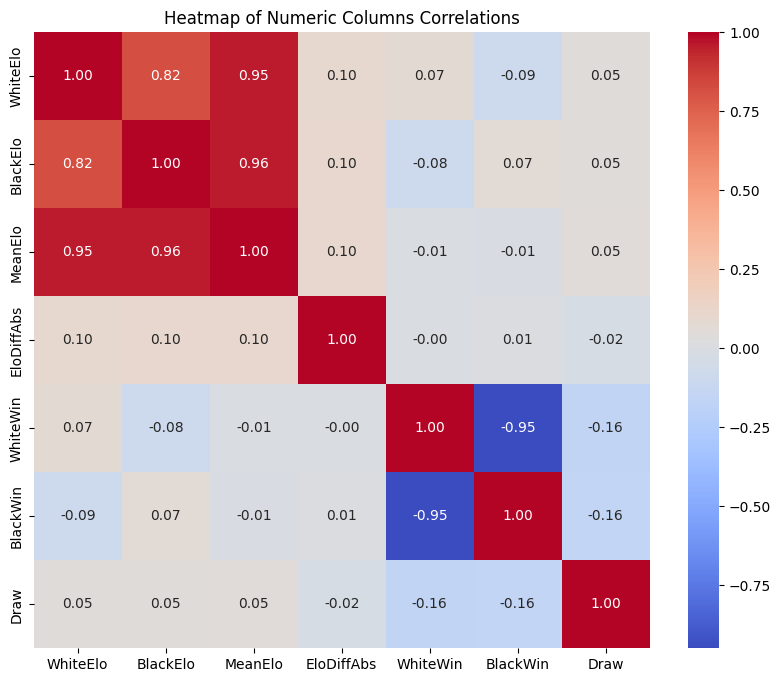

In [57]:
def plot_heatmap(data):
    numeric_df = data.select_dtypes(include="number")
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title("Heatmap Correlations")
    plt.show()
    
plot_heatmap(df)

White elo has positive correlation with white win and negative correlation with black win. Same for black elo.

Also, Elo has small correlation with draw.

Let's see the distribution of the results, where:
   - "1-0": White wins
   - "0-1": Black wins
   - "1/2-1/2": Draw

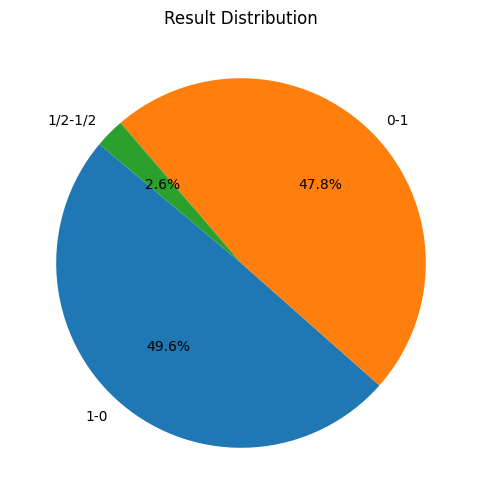

In [58]:
_, axs = plt.subplots(figsize=(12, 6))
plot_pie(axs, df, "Result", "Result Distribution", threshold=0)
plt.show()

And let's see the distribution of Events.

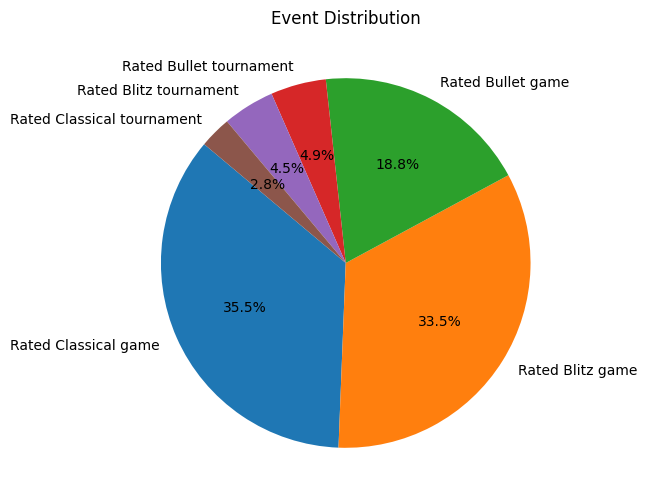

In [44]:
_, axs = plt.subplots(figsize=(12, 6))
plot_pie(axs, df, "Event", "Event Distribution", threshold=0)
plt.show()

And now - the distribution of the results for each event.

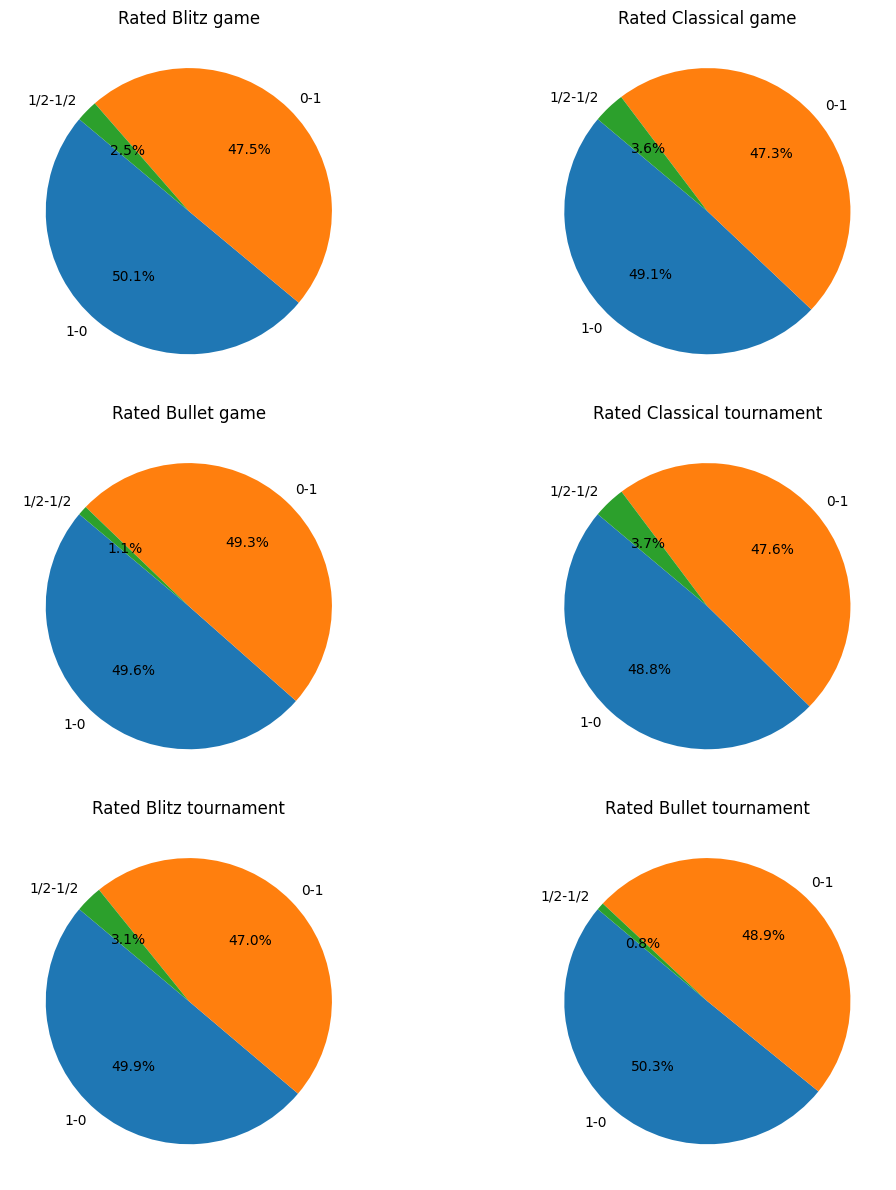

In [46]:
_, axs = plt.subplots(3, 2, figsize=(12, 12))
idx = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]

events = df["Event"].unique()
for (i, j), event in zip(idx, events):
    event_df = df[df["Event"] == event]
    plot_pie(axs[i][j], event_df, column_name="Result", title=f"{event}", threshold=0)

plt.tight_layout()
plt.show()

## Elo vs Result

Let's compare mean Elo of all games and mean Elo of draws.

Mean Elo: 1623.4574
Mean Elo for Draw: 1707.0508


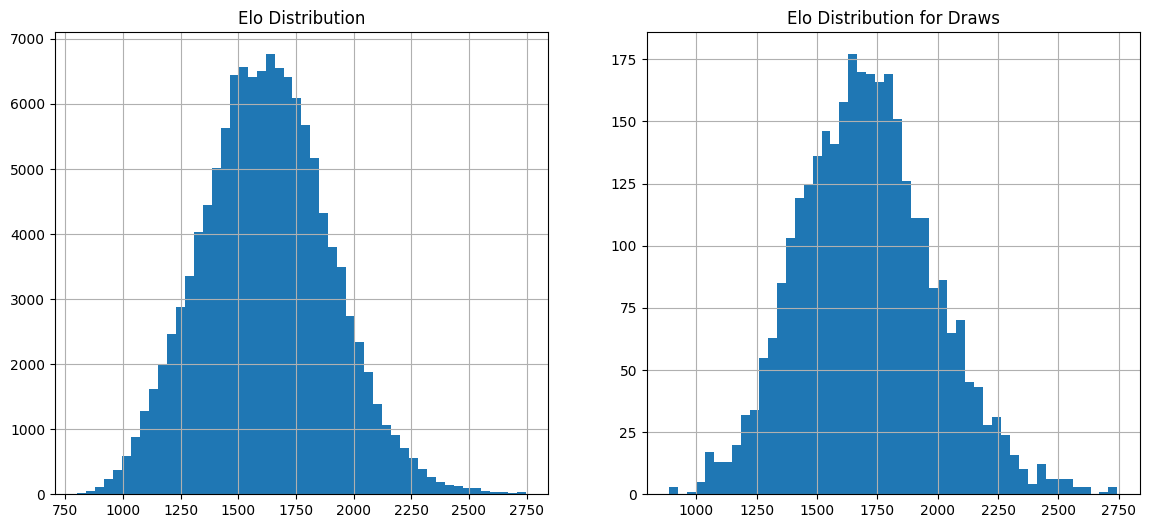

In [12]:
print("Mean Elo:", df["MeanElo"].mean())
print("Mean Elo for Draw:", df[df["Draw"] == 1]["MeanElo"].mean())

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

df["MeanElo"].hist(bins=50, ax=axes[0])
axes[0].set_title("Elo Distribution")

df[df["Draw"] == 1]["MeanElo"].hist(bins=50, ax=axes[1])
axes[1].set_title("Elo Distribution for Draws")

plt.show()

Draws have higher mean Elo.

White wins: 1643.8562306118408
Black loses: 1600.134974589136


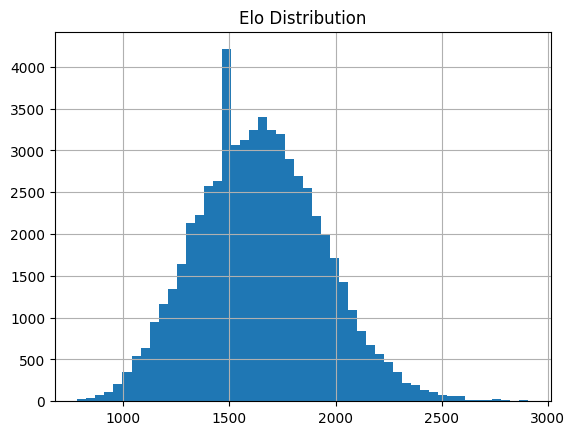

In [18]:
white_wins_df = df[df["WhiteWin"] == 1]
print("White wins:", white_wins_df["WhiteElo"].mean())
print("Black loses:", white_wins_df["BlackElo"].mean())

white_wins_df["WhiteElo"].hist(bins=50)
plt.title("Elo Distribution")
plt.show()

Black wins: 1644.3871326422388
White loses: 1596.5095111019878


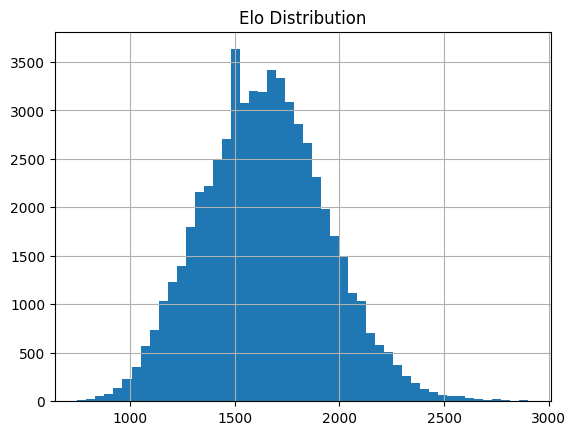

In [19]:
black_wins_df = df[df["BlackWin"] == 1]
print("Black wins:", black_wins_df["BlackElo"].mean())
print("White loses:", black_wins_df["WhiteElo"].mean())

black_wins_df["BlackElo"].hist(bins=50)
plt.title("Elo Distribution")
plt.show()

In [28]:
del white_wins_df
del black_wins_df